In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv



In [2]:
load_dotenv()

True

In [3]:
Td_data = pd.read_csv("Stock Data - NYSE_TD.csv", infer_datetime_format=True, parse_dates=True, index_col="Date").drop(columns=["Open", "High", "Low", "Volume"])
Bmo_data = pd.read_csv("Stock Data - TSE_BMO.csv",infer_datetime_format=True, parse_dates=True, index_col="Date").drop(columns=["Open", "High", "Low", "Volume"])
RY_data = pd.read_csv("Stock Data - TSE_RY.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").drop(columns=["Open", "High", "Low", "Volume"])
BNS_data = pd.read_csv("Stock Data - TSE_BNS.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").drop(columns=["Open", "High", "Low", "Volume"])
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").drop(columns=["Open", "High", "Low", "Volume"])

 ## Combine DataFrames, Sort Index, and Rename Columns

In [4]:
Stock_concat = pd.concat([Td_data, Bmo_data, RY_data, BNS_data, SP500_data], axis=1, join="inner", keys=["BMO", "TD", "BNS", "RY", "S&P 500"]).dropna().reset_index()

# Sort datetime index in ascending order (past to present)
Stock_concat = Stock_concat.sort_index()

# Display a few rows
Stock_concat.head()

,Date,BMO,TD,BNS,RY,S&P 500
,,Close,Close,Close,Close,Close
0,2016-04-01 16:00:00,38.56,76.66,73.04,55.54,2012.66
1,2016-05-01 16:00:00,38.26,76.62,72.82,56.13,2016.71
2,2016-07-01 16:00:00,36.22,73.52,70.25,54.31,1943.09
3,2016-11-01 16:00:00,36.09,73.61,70.41,54.19,1923.67
4,2016-12-01 16:00:00,36.73,74.18,70.92,54.05,1938.68


In [5]:
type(Stock_concat["Date"])

Stock_concat["Date"] = pd.to_datetime(Stock_concat["Date"])
Stock_concat

,Date,BMO,TD,BNS,RY,S&P 500
,,Close,Close,Close,Close,Close
0,2016-04-01 16:00:00,38.56,76.66,73.04,55.54,2012.66
1,2016-05-01 16:00:00,38.26,76.62,72.82,56.13,2016.71
2,2016-07-01 16:00:00,36.22,73.52,70.25,54.31,1943.09
3,2016-11-01 16:00:00,36.09,73.61,70.41,54.19,1923.67
4,2016-12-01 16:00:00,36.73,74.18,70.92,54.05,1938.68
...,...,...,...,...,...,...
1461,2021-12-21 16:00:00,73.36,133.14,131.57,87.69,4649.23
1462,2021-12-22 16:00:00,74.35,135.35,132.59,88.67,4696.56
1463,2021-12-23 16:00:00,75.13,135.58,133.64,89.31,4725.79


In [6]:
Stock_concat.set_index("Date", inplace=True)

In [7]:
Stock_concat.index = Stock_concat.index.date

In [8]:
Stock_concat

,BMO,TD,BNS,RY,S&P 500
,Close,Close,Close,Close,Close
2016-04-01,38.56,76.66,73.04,55.54,2012.66
2016-05-01,38.26,76.62,72.82,56.13,2016.71
2016-07-01,36.22,73.52,70.25,54.31,1943.09
2016-11-01,36.09,73.61,70.41,54.19,1923.67
2016-12-01,36.73,74.18,70.92,54.05,1938.68
...,...,...,...,...,...
2021-12-21,73.36,133.14,131.57,87.69,4649.23
2021-12-22,74.35,135.35,132.59,88.67,4696.56
2021-12-23,75.13,135.58,133.64,89.31,4725.79


In [9]:
Stock_concat.describe()

,BMO,TD,BNS,RY,S&P 500
,Close,Close,Close,Close,Close
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,54.082169,97.068022,99.543247,72.003015,2946.422401
std,8.663666,15.579969,14.196212,8.477017,714.147250
min,33.830000,56.240000,65.000000,46.720000,1829.080000
25%,47.095000,86.272500,92.972500,68.262500,2432.480000
50%,55.510000,97.720000,99.645000,74.470000,2797.915000
75%,58.222500,102.417500,105.197500,78.110000,3274.375000
max,76.300000,140.270000,134.790000,91.260000,4793.060000


In [10]:
Stock_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 2016-04-01 to 2021-12-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BMO, Close)      1466 non-null   float64
 1   (TD, Close)       1466 non-null   float64
 2   (BNS, Close)      1466 non-null   float64
 3   (RY, Close)       1466 non-null   float64
 4   (S&P 500, Close)  1466 non-null   float64
dtypes: float64(5)
memory usage: 68.7+ KB


## Evaluate the Riskiness of Stocks

In [11]:
volatility = Stock_concat.std() * np.sqrt(252)

In [12]:
volatility = volatility.sort_values()

In [13]:
volatility

RY       Close      134.568478
BMO      Close      137.531435
BNS      Close      225.357877
TD       Close      247.324342
S&P 500  Close    11336.736135
dtype: float64

## Daily returns of the stock

In [14]:
daily_returns = Stock_concat.pct_change().dropna()
daily_returns

,BMO,TD,BNS,RY,S&P 500
,Close,Close,Close,Close,Close
2016-05-01,-0.007780,-0.000522,-0.003012,0.010623,0.002012
2016-07-01,-0.053319,-0.040459,-0.035293,-0.032425,-0.036505
2016-11-01,-0.003589,0.001224,0.002278,-0.002210,-0.009994
2016-12-01,0.017733,0.007744,0.007243,-0.002584,0.007803
2016-01-13,-0.022870,-0.029388,-0.024958,-0.019426,-0.024965
...,...,...,...,...,...
2021-12-21,0.010329,0.012164,0.012155,0.009904,0.017778
2021-12-22,0.013495,0.016599,0.007753,0.011176,0.010180
2021-12-23,0.010491,0.001699,0.007919,0.007218,0.006224


In [15]:
Stock_concat.isnull().mean() * 100

BMO      Close    0.0
TD       Close    0.0
BNS      Close    0.0
RY       Close    0.0
S&P 500  Close    0.0
dtype: float64

In [16]:
Stock_concat.isnull().sum()

BMO      Close    0
TD       Close    0
BNS      Close    0
RY       Close    0
S&P 500  Close    0
dtype: int64

In [17]:
correlation = daily_returns.corr()
correlation

,,BMO,TD,BNS,RY,S&P 500
,,Close,Close,Close,Close,Close
BMO,Close,1.000000,0.816641,0.813363,0.825671,0.725665
TD,Close,0.816641,1.000000,0.825647,0.837803,0.681618
BNS,Close,0.813363,0.825647,1.000000,0.832870,0.714774
RY,Close,0.825671,0.837803,0.832870,1.000000,0.658365
S&P 500,Close,0.725665,0.681618,0.714774,0.658365,1.000000


## Plot Correlation

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

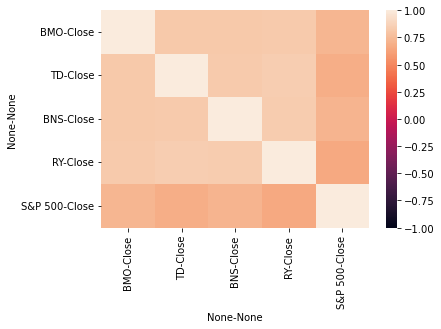

In [18]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1) 

## Plot daily Closing Price of each stocks

<AxesSubplot:>

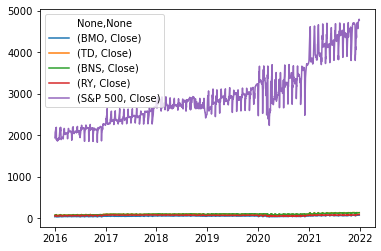

In [19]:
Stock_concat.plot()

<AxesSubplot:>

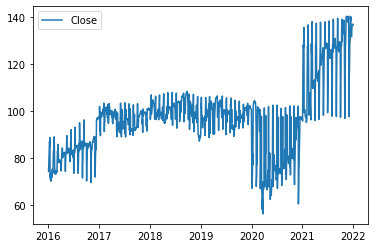

In [20]:
Stock_concat["TD"].plot()

<AxesSubplot:>

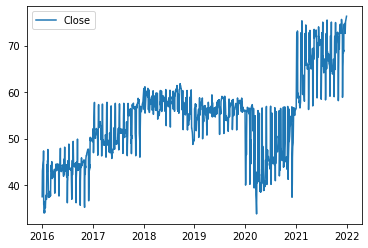

In [21]:
Stock_concat["BMO"].plot()

<AxesSubplot:>

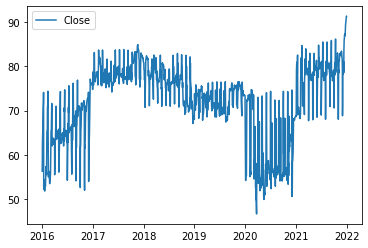

In [22]:
Stock_concat["RY"].plot()

<AxesSubplot:>

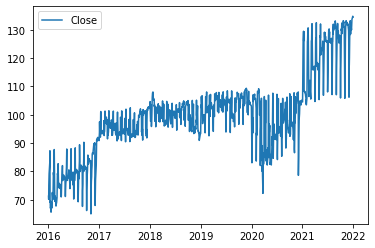

In [23]:
Stock_concat["BNS"].plot()

<AxesSubplot:>

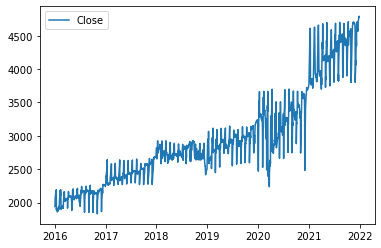

In [24]:
Stock_concat["S&P 500"].plot()

## Calculate 20-Day Simple Moving Average (SMA20)


In [25]:
sma20 = Stock_concat.rolling(window=20).mean()
sma20.dropna()

,BMO,TD,BNS,RY,S&P 500
,Close,Close,Close,Close,Close
2016-03-02,36.3560,73.3440,69.5400,54.3715,1914.8005
2016-04-02,36.3420,73.2365,69.4375,54.4375,1909.9400
2016-05-02,36.3125,73.1220,69.3535,54.4710,1903.1070
2016-08-02,36.3500,73.1225,69.3055,54.5395,1898.6245
2016-09-02,36.3570,73.0185,69.1670,54.5385,1895.0515
...,...,...,...,...,...
2021-12-21,74.0600,136.8745,129.7160,84.8210,4640.2255
2021-12-22,74.1165,136.7115,129.7640,85.1385,4640.9065
2021-12-23,74.1135,136.4980,129.8625,85.4340,4642.6610


## Calculate 50-Day Simple Moving Average (SMA50)



In [26]:
sma50 = Stock_concat.rolling(window=50).mean()
sma50.dropna()

,BMO,TD,BNS,RY,S&P 500
,Close,Close,Close,Close,Close
2016-03-17,37.9668,74.3554,70.2418,56.2274,1933.4610
2016-03-18,38.0458,74.3944,70.2854,56.3880,1934.1994
2016-03-21,38.1314,74.4428,70.3354,56.5386,1934.8972
2016-03-22,38.2572,74.5456,70.4262,56.7204,1937.0314
2016-03-23,38.3756,74.6470,70.5168,56.9020,1939.2922
...,...,...,...,...,...
2021-12-21,73.0372,136.5010,130.7542,82.9794,4609.4954
2021-12-22,73.1402,136.5940,130.8378,83.1854,4615.5998
2021-12-23,73.2680,136.7126,130.9446,83.4010,4623.1026


In [27]:
sma100 = Stock_concat.rolling(window=100).mean()
sma100.dropna()

,BMO,TD,BNS,RY,S&P 500
,Close,Close,Close,Close,Close
2016-01-06,40.6345,77.5936,73.4706,59.8595,2000.8136
2016-02-06,40.6881,77.6536,73.5364,59.9586,2001.7396
2016-03-06,40.7479,77.7161,73.6008,60.0520,2002.5638
2016-06-06,40.8336,77.8144,73.6916,60.1675,2004.2270
2016-07-06,40.9248,77.9161,73.7870,60.2963,2006.1116
...,...,...,...,...,...
2021-12-21,69.8012,132.0145,129.8541,80.8873,4524.1814
2021-12-22,69.8803,132.1129,129.9136,80.9920,4527.1406
2021-12-23,69.9598,132.2073,129.9800,81.0986,4530.2070


## Overlay Daily Closing Prices of SHOP and SMAs


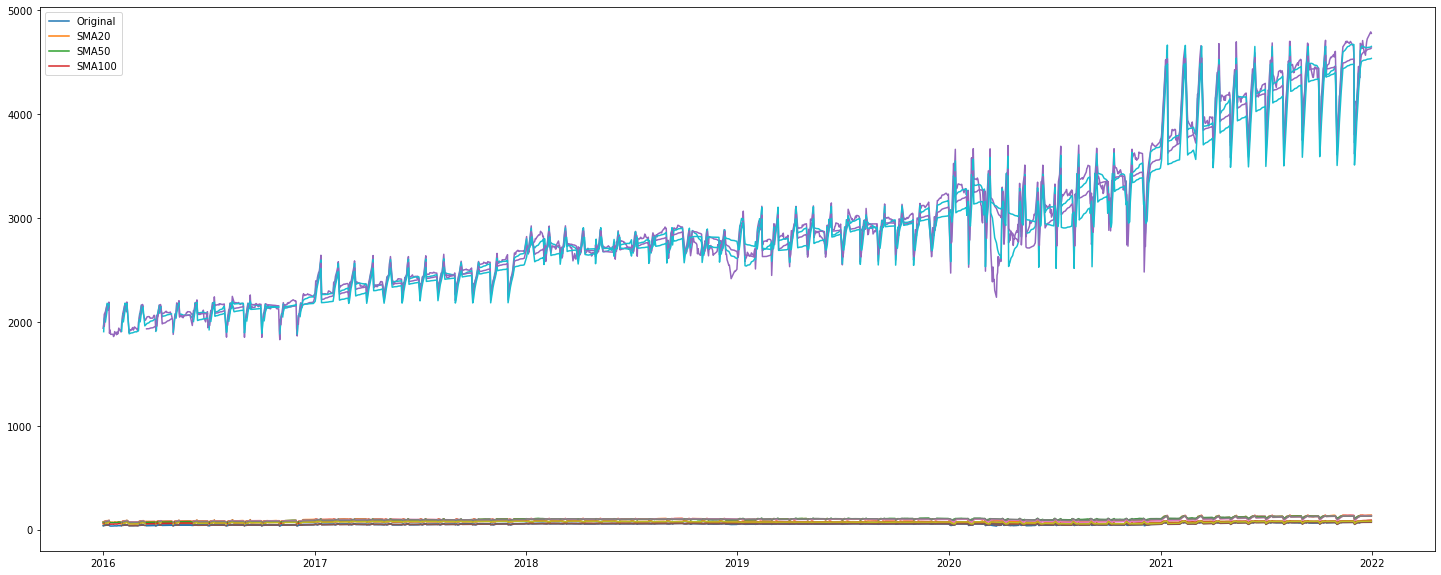

In [28]:
# Set figure of the daily closing prices of SHOP
ax = Stock_concat.plot(figsize=(25,10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
sma20.plot(ax=ax)
sma50.plot(ax=ax)
sma100.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "SMA20", "SMA50", "SMA100"]);

In [29]:
from MCForecastTools import MCSimulation 

In [3]:
MCTd_data = pd.read_csv("Stock Data - NYSE_TD.csv", infer_datetime_format=True, parse_dates=True, index_col="Date")
MCBmo_data = pd.read_csv("Stock Data - TSE_BMO (1).csv",infer_datetime_format=True, parse_dates=True, index_col="Date")
MCRY_data = pd.read_csv("Stock Data - TSE_RY.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date")
MCBNS_data = pd.read_csv("Stock Data - TSE_BNS.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date")
MCSP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date")


In [4]:
MCStock_concat = pd.concat([MCTd_data, MCBmo_data, MCRY_data, MCBNS_data, MCSP500_data], axis=1, join="inner", keys=["BMO", "TD", "BNS", "RY", "S&P 500"]).reset_index()
MCStock_concat

Date    BMO                                    TD          \
                           Open   High    Low  Close   Volume    Open    High   
0    2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196   76.82   76.99   
1    2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170   76.67   77.05   
2    2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706   73.78   74.22   
3    2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427   73.68   73.94   
4    2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123   73.98   74.63   
...                  ...    ...    ...    ...    ...      ...     ...     ...   
1461 2021-12-21 16:00:00  73.43  73.47  73.00  73.36  1426818  132.90  133.80   
1462 2021-12-22 16:00:00  73.25  74.36  73.25  74.35  1169767  132.94  135.43   
1463 2021-12-23 16:00:00  74.71  75.25  74.60  75.13  1026264  135.60  137.20   
1464 2021-12-29 16:00:00  76.24  76.65  76.05  76.19  1256191  137.77  138.25   
1465 2021-12-30 16:00:00  76.27  76.63  76.09  76.30   841164  137.21  137.60   

                      ...     RY                                 S&P 500  \
         Low   Close  ...   Open   High    Low  Close    Volume     Open   
0      76.04   76.66  ...  55.25  55.69  54.75  55.54   2979360  2038.20   
1      76.11   76.62  ...  55.61  56.28  55.31  56.13   2374476  2013.78   
2      73.13   73.52  ...  54.50  54.78  54.02  54.31   2530820  1985.32   
3      73.07   73.61  ...  54.83  54.87  53.82  54.19   2864681  1926.12   
4      73.27   74.18  ...  54.45  54.75  53.36  54.05   2733904  1927.83   
...      ...     ...  ...    ...    ...    ...    ...       ...      ...   
1461  132.01  133.14  ...  87.60  88.18  87.37  87.69   4874198  4594.96   
1462  132.90  135.35  ...  87.65  88.70  87.56  88.67   4637710  4650.36   
1463  135.57  135.58  ...  88.70  89.72  88.70  89.31   3525201  4703.96   
1464  136.77  136.94  ...  91.00  91.49  90.61  91.22   7349212  4788.64   
1465  136.48  136.59  ...  91.67  91.77  91.24  91.26  10531099  4794.23   

                                             
         High      Low    Close      Volume  
0     2038.20  1989.68  2012.66   802072115  
1     2021.94  2004.17  2016.71   619260483  
2     1985.32  1938.83  1943.09   860517477  
3     1935.65  1901.10  1923.67   775646469  
4     1947.38  1914.35  1938.68   759189614  
...       ...      ...      ...         ...  
1461  4651.14  4583.16  4649.23  2260147801  
1462  4697.67  4645.53  4696.56  1844650487  
1463  4740.74  4703.96  4725.79  1594292367  
1464  4804.06  4778.08  4793.06  1354785822  
1465  4808.93  4775.33  4778.73  1353705656  

[1466 rows x 26 columns]

In [5]:
MCStock_concat["Date"] = pd.to_datetime(MCStock_concat["Date"])
MCStock_concat

Date    BMO                                    TD          \
                           Open   High    Low  Close   Volume    Open    High   
0    2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196   76.82   76.99   
1    2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170   76.67   77.05   
2    2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706   73.78   74.22   
3    2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427   73.68   73.94   
4    2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123   73.98   74.63   
...                  ...    ...    ...    ...    ...      ...     ...     ...   
1461 2021-12-21 16:00:00  73.43  73.47  73.00  73.36  1426818  132.90  133.80   
1462 2021-12-22 16:00:00  73.25  74.36  73.25  74.35  1169767  132.94  135.43   
1463 2021-12-23 16:00:00  74.71  75.25  74.60  75.13  1026264  135.60  137.20   
1464 2021-12-29 16:00:00  76.24  76.65  76.05  76.19  1256191  137.77  138.25   
1465 2021-12-30 16:00:00  76.27  76.63  76.09  76.30   841164  137.21  137.60   

                      ...     RY                                 S&P 500  \
         Low   Close  ...   Open   High    Low  Close    Volume     Open   
0      76.04   76.66  ...  55.25  55.69  54.75  55.54   2979360  2038.20   
1      76.11   76.62  ...  55.61  56.28  55.31  56.13   2374476  2013.78   
2      73.13   73.52  ...  54.50  54.78  54.02  54.31   2530820  1985.32   
3      73.07   73.61  ...  54.83  54.87  53.82  54.19   2864681  1926.12   
4      73.27   74.18  ...  54.45  54.75  53.36  54.05   2733904  1927.83   
...      ...     ...  ...    ...    ...    ...    ...       ...      ...   
1461  132.01  133.14  ...  87.60  88.18  87.37  87.69   4874198  4594.96   
1462  132.90  135.35  ...  87.65  88.70  87.56  88.67   4637710  4650.36   
1463  135.57  135.58  ...  88.70  89.72  88.70  89.31   3525201  4703.96   
1464  136.77  136.94  ...  91.00  91.49  90.61  91.22   7349212  4788.64   
1465  136.48  136.59  ...  91.67  91.77  91.24  91.26  10531099  4794.23   

                                             
         High      Low    Close      Volume  
0     2038.20  1989.68  2012.66   802072115  
1     2021.94  2004.17  2016.71   619260483  
2     1985.32  1938.83  1943.09   860517477  
3     1935.65  1901.10  1923.67   775646469  
4     1947.38  1914.35  1938.68   759189614  
...       ...      ...      ...         ...  
1461  4651.14  4583.16  4649.23  2260147801  
1462  4697.67  4645.53  4696.56  1844650487  
1463  4740.74  4703.96  4725.79  1594292367  
1464  4804.06  4778.08  4793.06  1354785822  
1465  4808.93  4775.33  4778.73  1353705656  

[1466 rows x 26 columns]

In [6]:
MCStock_concat.set_index("Date", inplace=True)

In [7]:
MCStock_concat.index = MCStock_concat.index.date

In [8]:
MCStock_concat

BMO                                    TD                  \
             Open   High    Low  Close   Volume    Open    High     Low   
2016-04-01  38.63  38.64  38.14  38.56  1559196   76.82   76.99   76.04   
2016-05-01  38.60  38.72  37.99  38.26  1581170   76.67   77.05   76.11   
2016-07-01  36.44  36.89  36.20  36.22  1629706   73.78   74.22   73.13   
2016-11-01  36.40  36.42  35.82  36.09  1602427   73.68   73.94   73.07   
2016-12-01  36.55  36.89  36.21  36.73  2972123   73.98   74.63   73.27   
...           ...    ...    ...    ...      ...     ...     ...     ...   
2021-12-21  73.43  73.47  73.00  73.36  1426818  132.90  133.80  132.01   
2021-12-22  73.25  74.36  73.25  74.35  1169767  132.94  135.43  132.90   
2021-12-23  74.71  75.25  74.60  75.13  1026264  135.60  137.20  135.57   
2021-12-29  76.24  76.65  76.05  76.19  1256191  137.77  138.25  136.77   
2021-12-30  76.27  76.63  76.09  76.30   841164  137.21  137.60  136.48   

                             ...     RY                                 \
             Close   Volume  ...   Open   High    Low  Close    Volume   
2016-04-01   76.66  1755147  ...  55.25  55.69  54.75  55.54   2979360   
2016-05-01   76.62  1321730  ...  55.61  56.28  55.31  56.13   2374476   
2016-07-01   73.52  2246553  ...  54.50  54.78  54.02  54.31   2530820   
2016-11-01   73.61  1237175  ...  54.83  54.87  53.82  54.19   2864681   
2016-12-01   74.18  1372883  ...  54.45  54.75  53.36  54.05   2733904   
...            ...      ...  ...    ...    ...    ...    ...       ...   
2021-12-21  133.14  1553620  ...  87.60  88.18  87.37  87.69   4874198   
2021-12-22  135.35  1359621  ...  87.65  88.70  87.56  88.67   4637710   
2021-12-23  135.58  1278172  ...  88.70  89.72  88.70  89.31   3525201   
2021-12-29  136.94  1698259  ...  91.00  91.49  90.61  91.22   7349212   
2021-12-30  136.59   652033  ...  91.67  91.77  91.24  91.26  10531099   

            S&P 500                                         
               Open     High      Low    Close      Volume  
2016-04-01  2038.20  2038.20  1989.68  2012.66   802072115  
2016-05-01  2013.78  2021.94  2004.17  2016.71   619260483  
2016-07-01  1985.32  1985.32  1938.83  1943.09   860517477  
2016-11-01  1926.12  1935.65  1901.10  1923.67   775646469  
2016-12-01  1927.83  1947.38  1914.35  1938.68   759189614  
...             ...      ...      ...      ...         ...  
2021-12-21  4594.96  4651.14  4583.16  4649.23  2260147801  
2021-12-22  4650.36  4697.67  4645.53  4696.56  1844650487  
2021-12-23  4703.96  4740.74  4703.96  4725.79  1594292367  
2021-12-29  4788.64  4804.06  4778.08  4793.06  1354785822  
2021-12-30  4794.23  4808.93  4775.33  4778.73  1353705656  

[1466 rows x 25 columns]

In [40]:
MCStock_concat.rename(columns={"Close": "close"}, inplace=True)

## Simulate five year portfolio growth with evenly-distributed stock investments


In [41]:
MC_even_dist = MCSimulation(
    portfolio_data = MCStock_concat,
    weights = [.20,.20,.20, .20, .20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist.portfolio_data.head()

BMO                                                TD         \
             Open   High    Low  close   Volume daily_return   Open   High   
2016-04-01  38.63  38.64  38.14  38.56  1559196          NaN  76.82  76.99   
2016-05-01  38.60  38.72  37.99  38.26  1581170    -0.007780  76.67  77.05   
2016-07-01  36.44  36.89  36.20  36.22  1629706    -0.053319  73.78  74.22   
2016-11-01  36.40  36.42  35.82  36.09  1602427    -0.003589  73.68  73.94   
2016-12-01  36.55  36.89  36.21  36.73  2972123     0.017733  73.98  74.63   

                          ...     RY                               S&P 500  \
              Low  close  ...    Low  close   Volume daily_return     Open   
2016-04-01  76.04  76.66  ...  54.75  55.54  2979360          NaN  2038.20   
2016-05-01  76.11  76.62  ...  55.31  56.13  2374476     0.010623  2013.78   
2016-07-01  73.13  73.52  ...  54.02  54.31  2530820    -0.032425  1985.32   
2016-11-01  73.07  73.61  ...  53.82  54.19  2864681    -0.002210  1926.12   
2016-12-01  73.27  74.18  ...  53.36  54.05  2733904    -0.002584  1927.83   

                                                               
               High      Low    close     Volume daily_return  
2016-04-01  2038.20  1989.68  2012.66  802072115          NaN  
2016-05-01  2021.94  2004.17  2016.71  619260483     0.002012  
2016-07-01  1985.32  1938.83  1943.09  860517477    -0.036505  
2016-11-01  1935.65  1901.10  1923.67  775646469    -0.009994  
2016-12-01  1947.38  1914.35  1938.68  759189614     0.007803  

[5 rows x 30 columns]

## Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns


In [ ]:
daily_returns = df_ticker.pct_change().dropna()
daily_returns

In [ ]:
 # Calculate covariance of all daily returns of social media stocks vs. S&P 500
BMO_covariance = daily_returns["BMO"].cov(daily_returns["S&P 500"])
TD_covariance = daily_returns["TD"].cov(daily_returns["S&P 500"])
BNS_covariance = daily_returns["BNS"].cov(daily_returns["S&P 500"])

In [42]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jahan\Downloads\Fintech-Project-1-master\Fintech-Project-1-master\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993614,1.002414,1.001836,1.002561,1.017178,0.999104,0.996168,0.998964,1.003046,1.006819,...,1.000185,1.011788,0.998024,1.002330,0.994394,1.001093,0.999882,0.997918,0.996114,0.999525
2,0.999651,0.998764,1.005815,1.016965,1.017269,0.993115,1.002089,0.997958,1.007268,1.016511,...,0.999579,1.014913,1.001861,1.002177,0.998337,1.008246,1.003092,1.002389,1.002618,1.004407
3,0.997134,0.993156,0.995778,1.011811,1.027539,0.998644,1.010400,0.999757,0.993351,1.028727,...,0.997202,1.020172,1.002450,1.007192,1.000986,1.015195,1.002657,1.002419,0.996850,1.003599
4,0.980766,0.995399,1.003893,1.011041,1.030901,0.996446,1.006112,0.997925,0.983095,1.031147,...,0.990331,1.012831,1.013577,1.000090,0.996450,1.019878,0.998672,1.000644,1.005666,0.995694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.042100,1.453891,2.234865,1.452362,2.083866,2.231940,1.373443,1.622153,1.337115,2.137676,...,1.456832,2.118557,1.646270,1.691818,2.186379,1.575259,1.463882,1.973475,2.857752,2.097485
1257,2.046758,1.447777,2.239343,1.453147,2.093401,2.226264,1.371796,1.637923,1.342639,2.139150,...,1.432132,2.110069,1.657553,1.681146,2.182631,1.573659,1.459032,1.971442,2.879641,2.120734
1258,2.045290,1.443765,2.267103,1.469499,2.085362,2.232793,1.367665,1.652687,1.338825,2.149413,...,1.425242,2.103352,1.636964,1.683110,2.202227,1.569823,1.466929,1.972185,2.897232,2.133868
1259,2.043271,1.448659,2.241317,1.466559,2.107738,2.252395,1.375689,1.660513,1.345432,2.131285,...,1.439727,2.119573,1.650829,1.674789,2.215417,1.575872,1.441144,1.990461,2.887472,2.154862


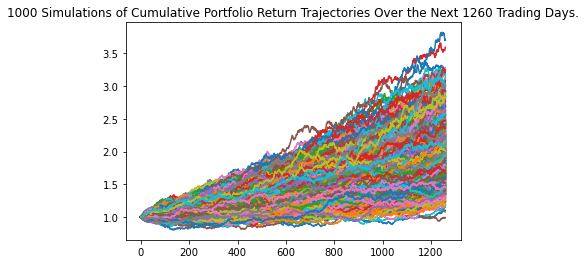

In [43]:
line_plot = MC_even_dist.plot_simulation()

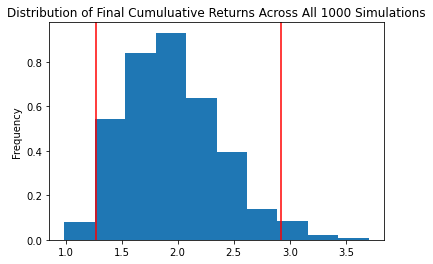

In [44]:
dist_plot = MC_even_dist.plot_distribution()

In [45]:
MC_sum = MC_even_dist.summarize_cumulative_return()
MC_sum

count           1000.000000
mean               1.946991
std                0.426496
min                0.989079
25%                1.628148
50%                1.908703
75%                2.207914
max                3.703874
95% CI Lower       1.268072
95% CI Upper       2.922508
Name: 1260, dtype: float64

## PYVIZ VISUALIZATION

In [ ]:
import hvplot.pandas as h